<a href="https://colab.research.google.com/github/seoran/github-slideshow/blob/master/%EC%84%AD%EC%94%A8%EC%97%90%EC%84%9C_%ED%99%94%EC%94%A8%EB%A1%9C_%EB%B3%80%ED%99%98%ED%95%98%EA%B8%B0_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

해결해야하는 문제

섭씨를 화씨로 변환해야함

f=c×1.8+32


기본적인 함수 설치

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

트레이닝 데이터 추가

In [3]:
celsius_q=np.array([-40,-10,0,8,15,22,38],dtype=float) #float는 실수형
fahrenheit_a=np.array([-40,14,32,46,59,72,100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


모델 만들기

In [4]:
l0=tf.keras.layers.Dense(units=1, input_shape=[1])

In [6]:
model=tf.keras.Sequential([l0])

In [7]:
model=tf.keras.Sequential([
  tf.keras.layers.Dense(units=1,input_shape=[1])
])

In [8]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1) )

모델 학습

In [9]:
history=model.fit(celsius_q,fahrenheit_a,epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


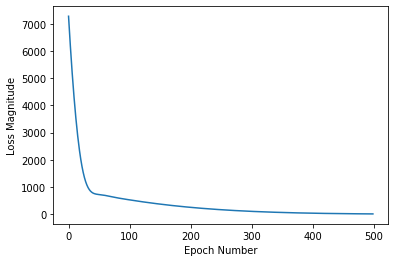

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

모델 예측값

In [11]:
print(model.predict([100.0]))

[[211.28308]]


In [14]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[-1.5946654]], dtype=float32), array([0.], dtype=float32)]


In [15]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74745]]
Model predicts that 100 degrees Celsius is: [[211.74745]] degrees Fahrenheit
These are the l0 variables: [array([[-0.02220936, -0.72108173,  0.01084178,  0.1834884 ]],
      dtype=float32), array([ 0.5436501, -3.0664973,  2.868924 ,  2.8096168], dtype=float32)]
These are the l1 variables: [array([[-0.46971694, -0.5453697 , -0.4498006 ,  0.8251538 ],
       [ 0.25614616,  0.9755953 ,  0.08259813,  0.6829952 ],
       [-1.0165497 , -0.7939919 , -0.12566383, -0.6542584 ],
       [ 0.2028745 , -0.97434133,  0.7078608 ,  0.05117735]],
      dtype=float32), array([-2.9609487, -3.0338664,  2.4078946, -2.9751902], dtype=float32)]
These are the l2 variables: [array([[-0.876024 ],
       [-1.3177736],
       [ 0.8167101],
       [-0.8765601]], dtype=float32), array([2.9914908], dtype=float32)]
